___

<a href='https://www.instagram.com/lanlearning/'> <img src='../images/logosmall.png' width="100" height="100"/></a>
___
<center>Copyright LanLearning 2020</center>





# Welcome Back! 

# What's your favorite visualization? 

## Please have the notebook open on your computers! 

<br>
<img src='../images/visual.jpg' width="500"/>
<br>



## Day 12: ML Day
### 1. What is a Model
### 2. How to use a model
### 3. Activity
### Extra Stuff for Extra time

# Try to be more engaging and interactive today! Please ask questions!

<br>
<img src='../images/net.png' width="300"/>
<br>

In [1]:
# let's just get everything so we don't need to import anything again

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('vgsales.csv')
astro = pd.read_csv('astronauts.csv')
parks = pd.read_csv('national_parks.csv')
cities = pd.read_csv('olympic_host_cities.csv')
nba = pd.read_csv('players.csv')
nba20 = pd.read_csv('20.csv')

In [3]:
# uncomment and run if needed to install
!pip install sklearn

# What do you think is a model? 

### Think about key elements, how the data fits in, what we learned before

### What are some models we took a look at before? 

In [4]:
# 1. Displays data somehow; graphs or anything similar 

In [ ]:
# 2. Organizes data easier to see trends and get MORE out of the data.

In [ ]:
# 3. Represent something about the data. 

In [ ]:
# vaderSentiment: took in data, and gave back sentiment scores

# What is a model? 

## A model is an idealized representation of something. 

### For example, take the example of the model of gravity, which says that if something is falling, it will accelerate at 9.8 meters per second. 
This is a model representation. It tells us something that occurs in the real world and tried to make a representation of that real-world system. 

**However** that system isn't perfect. The model of gravity does not take into account air resistance or other forces that are in play. 

<br>
<img src='../images/unnamed.png' width="400"/>
<br>

### Similarly, models in general are not a perfect representation of something. 

# What is an example of a model that you can think of?

In [ ]:
# 1. Linear Regression: correlation between highway miles per gallon vs prices of car. 

In [ ]:
# 2. Shooting form is a model; to do somethign a certain way.

# Not perfect, meaning there are errors. 

Obviously, models are not perfect. This means there is some error associated with the model. 

### We need to be good at being able to find the amount of error and account for that. 

That is the role of a Machine Learning engineer. He or she has to **fine-tune** models to make sure they are perfect. 

<br>
<img src='../images/tesla.jpg' width="500"/>
<br>

For example, people at Tesla are contiuously fixing and making their cars better. Similary, there is always some problem that can be solved to make your model better. **There is some parameter that can be optimized.**

### Quick Note: Edge Cases
Sometimes you have outliers in your data. These are people who are straying away from your data and don't really follow a general trend.

Take for example, the tallest man in the world. He is an outlier because he is so abnormally tall that he doesn't follow the general trend of height among humans. 

<br>
<img src='../images/tall.jpg' width="500"/>
<br>

When you are making a model, it is important to consider edge cases at time. 

# Starting slowly: Linear Regression
*Linear regression is drawing a line in between your points on a scatterplot.*

### Linear Regression uses a line to predict one variable from another.

**Definition from wikipedia**: linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables


Let's take the dataset from yesterday with ```'MP'``` and ```'FGA'```:

In [5]:
nba20.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams\adamsst01,C,26,OKC,58,58,1564,262,443,...,0.590,196,347,543,141,50,65,86,111,633
1,2,Bam Adebayo\adebaba01,PF,22,MIA,65,65,2235,408,719,...,0.690,165,518,683,333,78,85,185,164,1053
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,391,793,...,0.827,103,289,392,129,36,87,74,128,1001
3,4,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,0,501,77,227,...,0.607,8,72,80,74,11,7,40,46,211
4,5,Grayson Allen\allengr01,SG,24,MEM,30,0,498,79,176,...,0.857,5,61,66,43,6,1,23,36,221


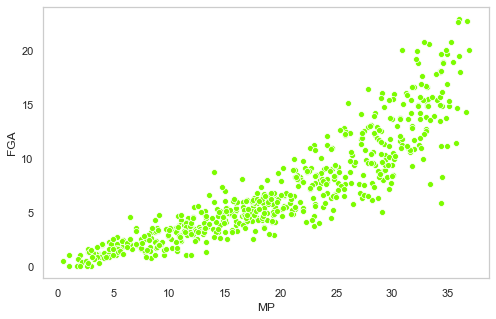

In [6]:
# redrawing the same plot from before:
sns.set(rc={'figure.figsize':(8, 5)}) 
sns.set_style("whitegrid", {'axes.grid' : False}) 
sns.scatterplot(x = 'MP', y = 'FGA', data=nba, color='lawngreen');

### Observations: 
- We can see that each point has an x and y-axis.
- We can see that two points with same x-value can have different y-values.


### Goal: use a line to be able to predict some y-value using a x-value via linear regression.

### For example:

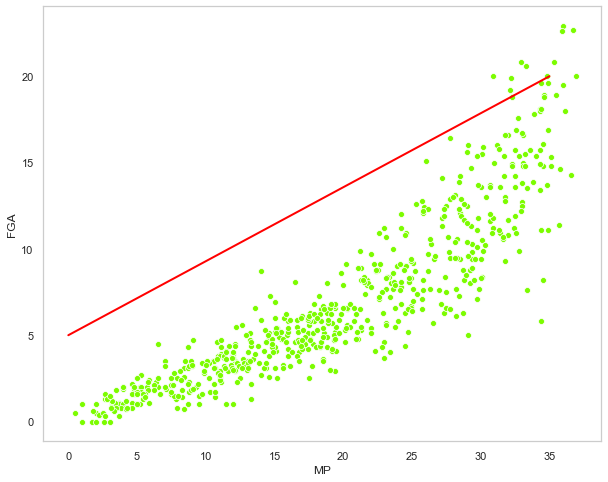

In [7]:
sns.set(rc={'figure.figsize':(10, 8)}) 
sns.set_style("whitegrid", {'axes.grid' : False}) 
sns.scatterplot(x = 'MP', y = 'FGA', data=nba, color='lawngreen');

#use plt.plot to plot a point, and pass in list of starting and ending x-values and y-values:
plt.plot([0,35],[5, 20], color='red', lw=2);

### Say you used the red line above: 

### First, how do you use the red line: 
The red line has some equation, which in this case is: $y = \frac{3}{7}x + 5$

Now you can plug in a value of ```MP``` and then get back a value for ```FGA``` which should be the prediction of the ```FGA``` given that amount of ```MP```.

For instance, if you plug in ```0``` for ```MP```, you get back ```5``` for ```FGA```. If you put in ```20```, you should get a value of roughly ```14```.

### So now I have a model, this red line is my model. But is it good? 
We use math and the theory behind linear regression to find the line that best fits these ponts. 

### What line from below do you think is the best model? 

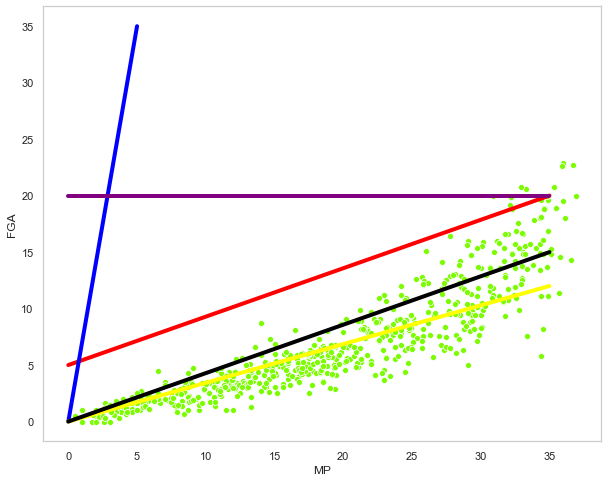

In [8]:
sns.set(rc={'figure.figsize':(10, 8)}) 
sns.set_style("whitegrid", {'axes.grid' : False}) 
sns.scatterplot(x = 'MP', y = 'FGA', data=nba, color='lawngreen');

#use plt.plot to plot a point, and pass in list of starting and ending x-values and y-values:
plt.plot([0,35],[5, 20], color='red', lw=4);
plt.plot([0,5],[0, 35], color='blue', lw=4);
plt.plot([0,35],[0, 12], color='yellow', lw=4);
plt.plot([0,35],[0, 15], color='black', lw=4);
plt.plot([0,35],[20, 20], color='purple', lw=4);

# Let's find the line of best fit! 

I'm not going to get into the theory here. There's a bunch of math that even I don't fully understand, and that's fine. 

### Finding the formula: 

**We know our equation is going to be in the form of $y = m*x + b$ for some slope $m$ and intercept $b$.**

Formula for slope: $m = r * \frac{s_y}{s_x}$
- $r$ is the correlation coefficient
- $s_y$ is the standard deviation of your y-values
- $s_x$ is the standard deviation of your x-values

Formula for intercept: $y = M_y - b * M_x$
- $M_y$ is the mean of your y-values
- $M_x$ is the mean of oyur x-values

Link for formulas: http://onlinestatbook.com/2/regression/intro.html

**We're going to use code to find this, simple and easy:**

In [9]:
r = np.corrcoef(nba['MP'], nba['FGA'])
r

# use the number that's not 1
r[0]

array([1.        , 0.89223661])

In [10]:
r[0][1]

0.8922366122585056

In [11]:
r = r[0][1]
r

0.8922366122585056

In [12]:
s_y = np.std(nba['FGA'])
s_x = np.std(nba['MP'])

b = r * (s_y/s_x)
b

0.45350883243989104

In [13]:
m_y = np.mean(nba['FGA'])
m_x = np.mean(nba['MP'])

y = m_y - b*m_x
y

-1.833446246166285

In [14]:
print('My formula is ' + 'y = ' + str(np.round(b, 2)) + 'x ' + str(np.round(y, 2)) + '.')

My formula is y = 0.45x -1.83.


# $y = 0.45x - 1.83$

Let's plot this line with all of our other lines: 

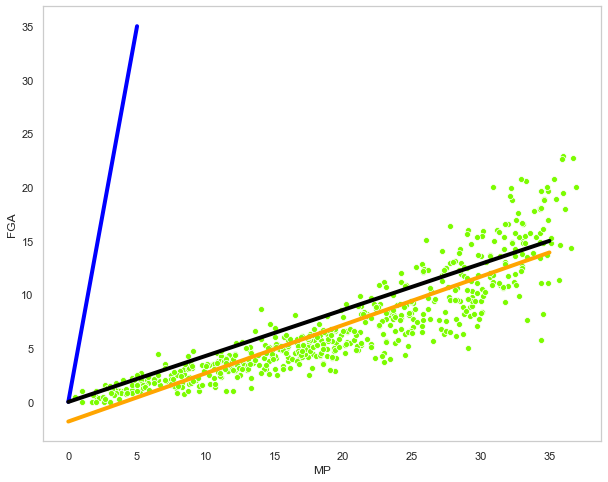

In [21]:
sns.set(rc={'figure.figsize':(10, 8)}) 
sns.set_style("whitegrid", {'axes.grid' : False}) 
sns.scatterplot(x = 'MP', y = 'FGA', data=nba, color='lawngreen');

#use plt.plot to plot a point, and pass in list of starting and ending x-values and y-values:
#plt.plot([0,35],[5, 20], color='red', lw=4);
plt.plot([0,5],[0, 35], color='blue', lw=4);
#plt.plot([0,35],[0, 12], color='yellow', lw=4);
plt.plot([0,35],[0, 15], color='black', lw=4);
#plt.plot([0,35],[20, 20], color='purple', lw=4);
plt.plot([0,35],[0.45*0 - 1.83, 0.45*35 - 1.83], color='orange', lw=4);

### What is error in this case? 
The goal is the minimize error, in this case the error is the distance between the prediction and the actual value. 

For exampl, let's tak a look at our DataFrame's first row: 

In [17]:
nba.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams\adamsst01,C,26,OKC,58,58,27.0,4.5,7.6,...,0.590,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9
1,2,Bam Adebayo\adebaba01,PF,22,MIA,65,65,34.4,6.3,11.1,...,0.690,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,33.1,7.4,15.0,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9


# MP is 27 and FGA is 7.6

What happens if we plug this into our new function

# $y = 0.45x - 1.83$

# $y = 0.45*27 - 1.83 = 10.32$

In [18]:
0.45*27 - 1.83

10.32

In [19]:
10.32 - 7.6

2.7200000000000006

For this player we predict ```10.32``` which means we have an error of ```2.72```.

## Our orange line minimizes the sum of all errors! 

The other lines' errors added up together will absolutely have a bigger error than the orang line. 

**This is the power of linear regression and why you hear the phrase best-fit line.**

# That was a bunch of searching and coding

The goal is to be able to understand what's going on and what you need done, but you want the computer to do it. 

You want to make use of **libraries** provided to you to be able to do the work for you. 

We will use **Sci-Py library's linregress** to find our orange line. 

Here's documentation for it: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

In [22]:
from scipy import stats

x = np.array(nba['MP'])
y = np.array(nba['FG'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [23]:
slope

0.21509322559087718

In [24]:
intercept

-1.036190635618163

### That was different than what we got, let's try sklearn, the Python ML library

In [ ]:
#!pip install sklearn

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
x

array([27. , 34.4, 33.1, 12.2, 16.6, 25.7, 11.7, 21.1,  5.7, 19.3,  7. ,
       30.9,  1.7,  5.2, 32.5, 30.1, 16. , 28.2, 24.7, 33.4, 24.8, 33.2,
       17.6, 25.7, 32.4, 14.5, 15. , 34.9, 30.4, 33. , 17.1, 17.5,  9.5,
       23. , 22.2, 25.1, 25.8, 23.5, 17.2, 36. , 22. , 18.2, 33.1, 15. ,
        8.8,  8.7, 10.5, 21.3, 17.9, 13. , 21.7, 29.3, 27.1, 19.4,  8.4,
       19.4, 28.5, 27.2, 28.5, 33.1,  6.7,  3.5, 11. ,  3. ,  5.3, 17.7,
       36.1, 13.2,  5.8, 22.6, 24.2, 10.7,  2.6,  5.9, 27.3, 30.7,  7.1,
       10.6, 30.7, 28.5, 28.2,  4. , 34. ,  3.7, 14.8, 24.9, 17.9, 23.7,
       23.6, 13.2, 27.3, 29. , 20.2,  8.4, 34.3,  8.1,  8.7,  5.6, 25.4,
        3.2, 32.8, 11. ,  9. , 16. , 15.1, 14.6, 29.2, 18.4, 17.8, 20.3,
       22.9, 12.1,  8.4, 21. ,  8.3, 10.3, 11.9, 12.3, 11.5, 20.3, 12.1,
       11.8, 12.5, 21.7, 24.2, 23. , 25.3, 12.5,  8.7,  3.7,  7.5, 33.2,
       28.7, 28.6, 18.3, 10.8,  3.2, 30.1, 29.4, 32.6, 17.6, 18.6, 14.6,
       17.4, 29.2, 29.4, 28.7, 23.9, 24.5, 27.8, 10

In [28]:
# for sklearn linear model, we need to prepare the data

x = x.reshape((-1, 1))
x

array([[27. ],
       [34.4],
       [33.1],
       [12.2],
       [16.6],
       [25.7],
       [11.7],
       [21.1],
       [ 5.7],
       [19.3],
       [ 7. ],
       [30.9],
       [ 1.7],
       [ 5.2],
       [32.5],
       [30.1],
       [16. ],
       [28.2],
       [24.7],
       [33.4],
       [24.8],
       [33.2],
       [17.6],
       [25.7],
       [32.4],
       [14.5],
       [15. ],
       [34.9],
       [30.4],
       [33. ],
       [17.1],
       [17.5],
       [ 9.5],
       [23. ],
       [22.2],
       [25.1],
       [25.8],
       [23.5],
       [17.2],
       [36. ],
       [22. ],
       [18.2],
       [33.1],
       [15. ],
       [ 8.8],
       [ 8.7],
       [10.5],
       [21.3],
       [17.9],
       [13. ],
       [21.7],
       [29.3],
       [27.1],
       [19.4],
       [ 8.4],
       [19.4],
       [28.5],
       [27.2],
       [28.5],
       [33.1],
       [ 6.7],
       [ 3.5],
       [11. ],
       [ 3. ],
       [ 5.3],
       [17.7],
       [36

In [29]:
# fitting or training your model

reg = LinearRegression().fit(x, y)

In [30]:
#To retrieve the intercept:
print(reg.intercept_)

#For retrieving the slope:
print(reg.coef_[0])

-1.0361906356181594
0.215093225590877


### Both sklearn and scipy gave us the same results. Let's plot ths against our orange line.

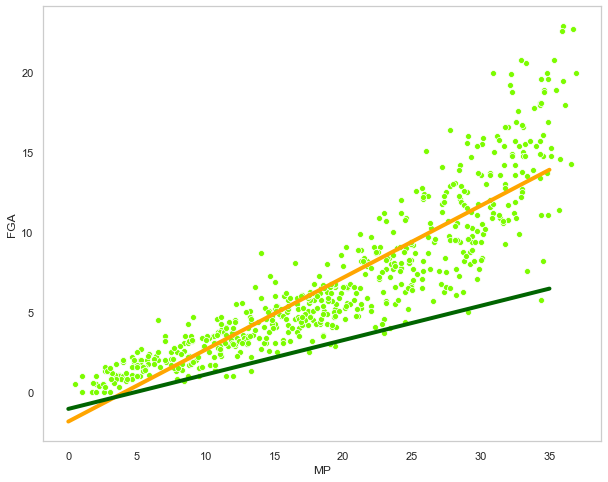

In [31]:
sns.set(rc={'figure.figsize':(10, 8)}) 
sns.set_style("whitegrid", {'axes.grid' : False}) 
sns.scatterplot(x = 'MP', y = 'FGA', data=nba, color='lawngreen');

#use plt.plot to plot a point, and pass in list of starting and ending x-values and y-values:
plt.plot([0,35],[0.45*0 - 1.83, 0.45*35 - 1.83], color='orange', lw=4);
plt.plot([0,35],[0.215*0 - 1.04, 0.215*35 - 1.04], color='darkgreen', lw=4);

# What do you think, what line is better?

# Recap

### 1. We started with a problem.

We want to guess FGA from MP


### 2. We understood a possible solution. 

Possible solution was linear regression, and we had to understand the basics. 


### 3. We used a model to problem-solve our situation.

# Now we apply this to more complex problems and models.

# New problem: Clustering or Classification. 

### Given a dataset with information about player heights and weights, how can you classify players based on position. 

Basically, can you predict the players' position based on height and weight. 

In [32]:
# code for creating fake data for educational purposes ONLY 
pounds = np.arange(150, 281, 5)
height_inches = np.arange(74, 90, 0.6)
positions = ['PG']*9 + ['SF']*9 + ['C']*9

players = pd.DataFrame(data=zip(pounds, height_inches, positions), columns=['Weight', 'Height', 'Position'])

players.head()

,Weight,Height,Position
0,150,74.0,PG
1,155,74.6,PG
2,160,75.2,PG
3,165,75.8,PG
4,170,76.4,PG


In [33]:
pounds_no = np.arange(150, 281, 15) - 6
height_inches_no = np.arange(74, 90, 1.8) + 2

player_noposition = pd.DataFrame(data=zip(pounds_no, height_inches_no), columns=['Weight', 'Height'])

player_noposition

## want to predict on data you don't have using the data you have

,Weight,Height
0,144,76.0
1,159,77.8
2,174,79.6
3,189,81.4
4,204,83.2
5,219,85.0
6,234,86.8
7,249,88.6
8,264,90.4


## Can we use the information from ```players``` to find the position of players in ```players_nopositions```?

Yes, we can. We need to first learn from ```players``` and then test or run our model on ```plaers_nopositions```.

### Background: 

If you were preparing for say a cooking competition. You would need to train your cooking and test it on people. 

You train on your family. And they tell you whether your cooking was good or not, and then you go and improve. Eventually, you feel ready and then go to Gordon Ramsey for the real test. 

<br>
<img src='../images/ramsey.jpg' width="300"/>
<br>

# We will solve this using K-Nearest Neighbor model.

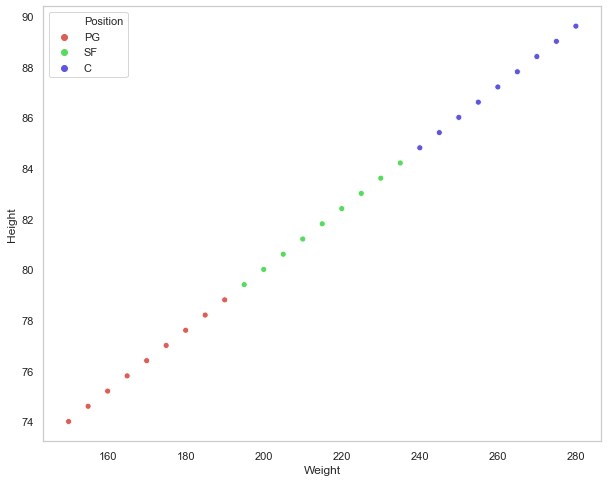

In [34]:
sns.set(rc={'figure.figsize':(10, 8)}) 
sns.set_style("whitegrid", {'axes.grid' : False}) 
sns.scatterplot(x = 'Weight', y = 'Height', data=players, hue='Position', palette=sns.color_palette("hls", 3));

### Above is the Data we have info about. 

### How does k-NN work: 
1. First you take a value from your unknown data (in this case players_noposition). 
2. You find the **k** closest points (that you have info about) and see the majority of the positions from them. 
3. You give that unknown point that majority label (category, in this case position). 

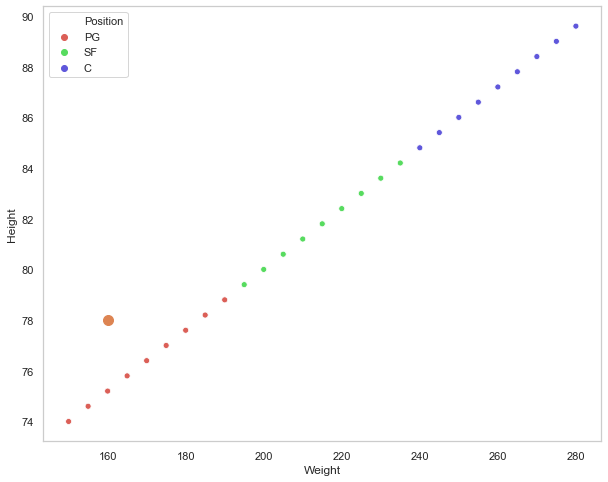

In [35]:
sns.set(rc={'figure.figsize':(10, 8)}) 
sns.set_style("whitegrid", {'axes.grid' : False}) 
sns.scatterplot(x = 'Weight', y = 'Height', data=players, hue='Position', palette=sns.color_palette("hls", 3));
plt.scatter(160, 78, marker='o', s=100)

### If k = 3, the three nearest points to the orange one are all red or PG, this means we give the orange point PG position. 

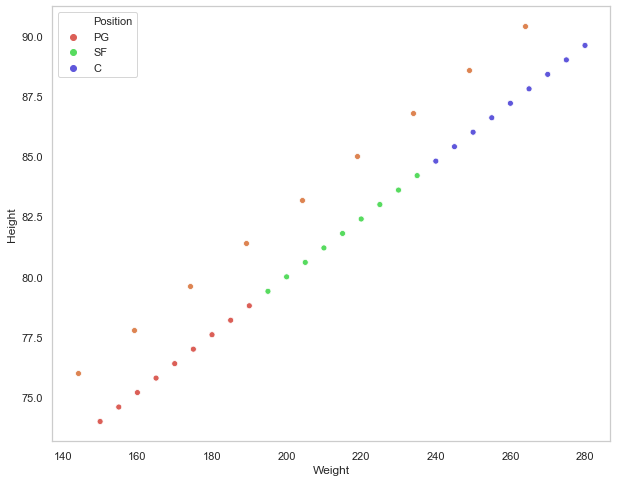

In [36]:
sns.set(rc={'figure.figsize':(10, 8)}) 
sns.set_style("whitegrid", {'axes.grid' : False}) 
sns.scatterplot(x = 'Weight', y = 'Height', data=players, hue='Position', palette=sns.color_palette("hls", 3));
sns.scatterplot(x = 'Weight', y = 'Height', data=player_noposition);

# Time to use the model! 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# Creating the knn model:
knn = KNeighborsClassifier(n_neighbors = 7) #change parameter if you want

In [60]:
#knn.fit(___, ___) #first parameter is your features
                  #second parameter is your target variable, or goal variable or the guess you want

In [61]:
# need to prepare the data:

# knn takes in an array of arrays: 
# for example: [[height1, weight1], [height2, weight2] ...]

weights = players['Weight']
heights = players['Height']

training_data = list(zip(weights, heights))
training_target = players['Position']

training_data

[(150, 74.0),
 (155, 74.6),
 (160, 75.19999999999999),
 (165, 75.79999999999998),
 (170, 76.39999999999998),
 (175, 76.99999999999997),
 (180, 77.59999999999997),
 (185, 78.19999999999996),
 (190, 78.79999999999995),
 (195, 79.39999999999995),
 (200, 79.99999999999994),
 (205, 80.59999999999994),
 (210, 81.19999999999993),
 (215, 81.79999999999993),
 (220, 82.39999999999992),
 (225, 82.99999999999991),
 (230, 83.59999999999991),
 (235, 84.1999999999999),
 (240, 84.7999999999999),
 (245, 85.39999999999989),
 (250, 85.99999999999989),
 (255, 86.59999999999988),
 (260, 87.19999999999987),
 (265, 87.79999999999987),
 (270, 88.39999999999986),
 (275, 88.99999999999986),
 (280, 89.59999999999985)]

In [62]:
knn.fit(training_data, training_target) #this will train your model, aka you learn using the fit function

# always fit on train data
# no outputs

KNeighborsClassifier(n_neighbors=7)

In [63]:
# now we need to test the model, or predict the labels of our unknown data points

# first prep the data the same way: 

weights_test = player_noposition['Weight']
heights_test = player_noposition['Height']

test_data = list(zip(weights_test, heights_test))
test_data

[(144, 76.0),
 (159, 77.8),
 (174, 79.6),
 (189, 81.39999999999999),
 (204, 83.19999999999999),
 (219, 84.99999999999999),
 (234, 86.79999999999998),
 (249, 88.59999999999998),
 (264, 90.39999999999998)]

In [64]:
knn.predict(test_data)

array(['PG', 'PG', 'PG', 'PG', 'SF', 'SF', 'SF', 'C', 'C'], dtype=object)

# Change k to see how the outputs change!






### If we had actual positions for unknown dataframe, we can find the error of our model. But in this case we don't, which is sometimes an issue in Data Science.

Knn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Decision Trees
Decision tree makes a decision of whether something is a certain label or not. It uses ideas of trees from Computer Science, and has cool properties. 

**Flow-like structure**:

<br>
<img src='../images/dtree.png' width="600"/>
<br>

### Notice the outputs here are 'Walk' or 'Bus'. 

There are two outputs here. This is binary, which is a property of trees and a central theme in decision trees. On the other hand we had three possible output types for the K-NN model above. 

**This gives you the intuition to use different types of plots for different needs and outputs.**

*Decision trees can take three outputs, but its not advised. You have so many models, just use those instead.*

# Let's take a look at the ```parks``` dataframe

In [65]:
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


Let's try to transform the parks dataframe into some problem where we have binary labels. Binary in the sense that there is one of two choices for each row. 

We will create a column that will say ```'East'``` or ```'West'``` if the park is in the east or west of the United States. 

In [66]:
west_states = ['WY', 'CO', 'UT', 'NV', 'ID', 'CA', 'OR', 'WA', 'AK', 'MT']

def east_west(i):
    if i in west_states:
        return 'west'
    return 'east'

parks['Side'] = parks['State'].apply(east_west)
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Side
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,east
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,west
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,east
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,east
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,east


### Now we need to select features to split out dataset on

For example, in the picture form above, one of the splits is weather. If its raining, then its easy to tell you should take a bus. On the other two weather cases, you should further split and then decide. 

# What features you think are important?

### Information about the east of west states is in the Lat and Lon of the park locations. We should split on those! 

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

training_data = list(zip(parks['Latitude'], parks['Longitude']))
training_labels = parks['Side']

#DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42, max_depth=3) #parameter tuning
dtc.fit(training_data, training_labels)

# nothing gets returned because model is just trained

DecisionTreeClassifier(max_depth=3, random_state=42)

In [85]:
# testing model on the training dataset to get a feel for accuracy
dtc.score(training_data, training_labels)

# if you are testing on training data, obviously you're gonna do well
# imagine your teacher gives you the test before, and then you take that test

0.9464285714285714

### We got 95 percent accuracy on training data! But this makes sense, we should get a high accuracy if we test on the data we learned from. 

# Visualizing the DecisionTree

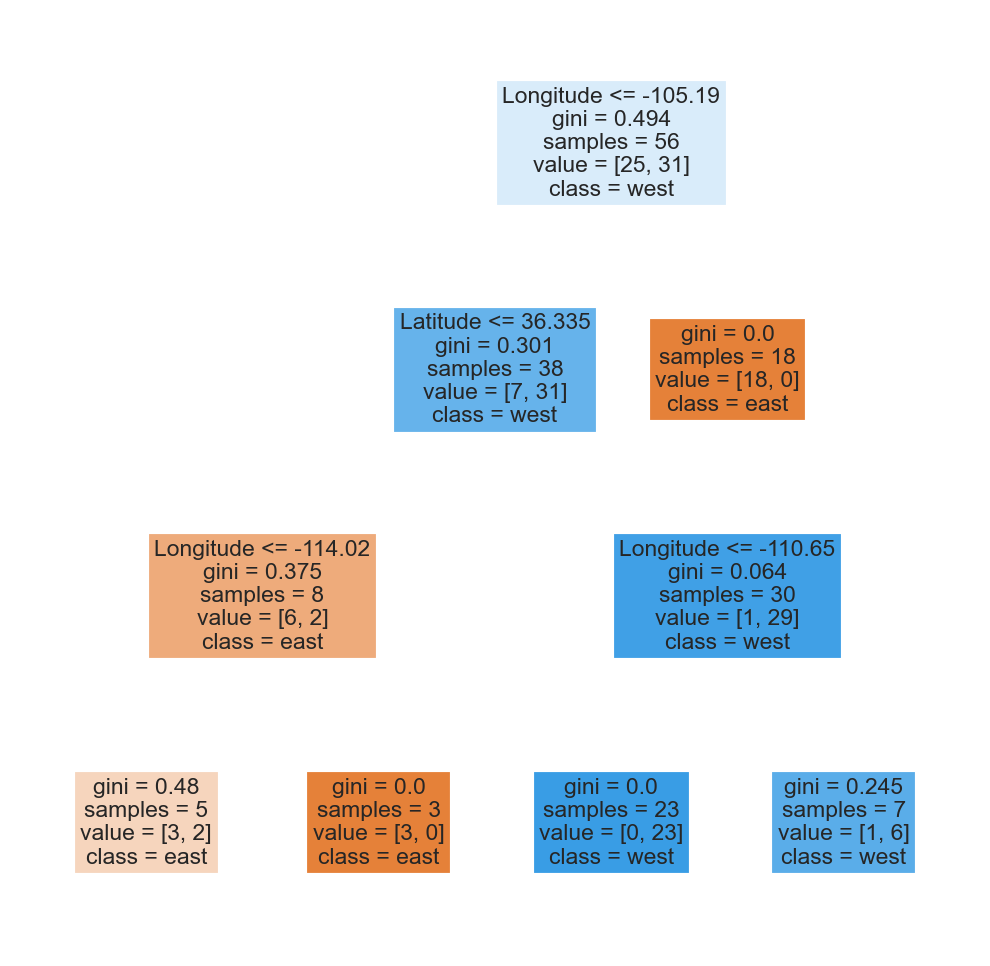

In [86]:
import sklearn.tree as tree

fn=['Latitude','Longitude']
cn=['east', 'west']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### On your own: find out what gini index is? What does it refer to and share a definition or a link in chat! 

# Another model type is a RandomForest (which is basically a bunch of trees working together). 

Learn RandomForests and SVMs on your own. Follor a process very similar to the models above.

In [87]:
0.05 * 100

5.0

# Last Thing for Today, Neural Networks: 
*Lots of Math, lots of Linear Algebra.*

<br>
<img src='../images/nn.png' width="500"/>
<br>

**This is loosely modeled after the human brain.** The circles (known as nodes) are neurons for the model.

### What is a neural network?
A Neural Network is a basically a set of systems that operate together and are used to classify/label or cluster objects together. They have the property of having the ability to recognize data types and create predictions accordingly. 

### Example use: Detect whether an email is spam or ham?

#### Basically, any problem, Neural Network can solve.

### How they work? 

<br>
<img src='../images/process.png' width="500"/>
<br>

Really small, bits of computations and changes happen, that when summed together they end up becoming an output. 

Think about the process of moving your hand. There are many complex bits of information that come together to make it happen. 

### The hidden layer are found by multiplying the input by some weights. 

<br>
<img src='../images/weights.jpeg' width="500"/>
<br>

### Watch out for inputs, you can only pass in numbers or one-hots are inputs. 

Here's what one-hot encoding is: 

<br>
<img src='../images/onehot.png' width="500"/>
<br>

Our model documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [89]:
df_train = pd.read_csv('http://people.ischool.berkeley.edu/~zp/course_datasets/lab_4_training.csv')
df_train.head()

,Unnamed: 0,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,1303,male,20,second,green,73.0,210.0,0,1,10.0,Yes,5.0,50.0,1.0,15.0
1,36,male,20,third,other,71.0,90.0,1,0,15.0,Yes,4.0,10.0,0.0,1.0
2,489,male,22,fourth,hazel,75.0,200.0,0,1,1.0,Yes,2.0,150.0,1.0,10.0
3,1415,male,19,second,brown,72.0,35.0,2,2,20.0,Yes,5.0,100.0,0.0,7.0
4,616,male,22,fourth,hazel,71.0,15.0,2,1,10.0,Yes,7.0,10.0,0.0,5.0


In [90]:
df_test = pd.read_csv('http://people.ischool.berkeley.edu/~zp/course_datasets/lab_4_test.csv')
df_test.head()

,Unnamed: 0,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,1303,male,20,second,green,73.0,210.0,0,1,10.0,Yes,5.0,50.0,1.0,15.0
1,36,male,20,third,other,71.0,90.0,1,0,15.0,Yes,4.0,10.0,0.0,1.0
2,489,male,22,fourth,hazel,75.0,200.0,0,1,1.0,Yes,2.0,150.0,1.0,10.0
3,1415,male,19,second,brown,72.0,35.0,2,2,20.0,Yes,5.0,100.0,0.0,7.0
4,616,male,22,fourth,hazel,71.0,15.0,2,1,10.0,Yes,7.0,10.0,0.0,5.0


In [106]:
#prepping the data
df_train_X = df_train.drop('gender', axis=1).replace('Yes', 1).replace('No', 0)
df_test_X = df_test.drop('gender', axis=1).replace('Yes', 1).replace('No', 0)
le1 = LabelEncoder()
df_train_X['year'] = le1.fit_transform(df_train_X['year'])
df_test_X['year'] = le1.fit_transform(df_test_X['year'])


le2 = LabelEncoder()
df_train_X['eyecolor'] = le2.fit_transform(df_train_X['eyecolor'])
df_test_X['eyecolor'] = le2.fit_transform(df_test_X['eyecolor'])


df_train_y = df_train['gender'].replace('male', 0).replace('female', 1)
df_test_y = df_test['gender'].replace('male', 0).replace('female', 1)


# building the model
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=50, alpha=0.00001,
                     solver='lbfgs', verbose=10,  random_state=42,tol=0.000000001)

# fitting the model
clf.fit(df_train_X, df_train_y)

/usr/local/Cellar/jupyterlab/2.1.2/libexec/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=100, max_iter=50, random_state=42,
              solver='lbfgs', tol=1e-09, verbose=10)

In [107]:
df_train_X.head()

,Unnamed: 0,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,1303,20,4,2,73.0,210.0,0,1,10.0,1,5.0,50.0,1.0,15.0
1,36,20,5,4,71.0,90.0,1,0,15.0,1,4.0,10.0,0.0,1.0
2,489,22,2,3,75.0,200.0,0,1,1.0,1,2.0,150.0,1.0,10.0
3,1415,19,4,1,72.0,35.0,2,2,20.0,1,5.0,100.0,0.0,7.0
4,616,22,2,3,71.0,15.0,2,1,10.0,1,7.0,10.0,0.0,5.0


In [108]:
df_train_y.head()

0    0
1    0
2    0
3    0
4    0
Name: gender, dtype: int64

In [109]:
print('Accuracy on training---')
y_pred_train=clf.predict(df_train_X)
print(accuracy_score(df_train_y, y_pred_train))

print('Accuracy on test---')
y_pred_test=clf.predict(df_test_X)
print(accuracy_score(df_test_y, y_pred_test))

Accuracy on training---
0.5911949685534591
Accuracy on test---
0.5979899497487438


# Pretty low accuracy

Making the models better is a big task and an important one in DS and ML. 

### Ways to make model better:
1. Using less features when training. 
2. Hyper-parameter tuning (fine-tuning)
    a. things like more or less layers
    b. learning rates etc.
3. Combine different models (bagging, ensemble techniques)

# Conclusion:

This is just the surface. There's a lot of model types out there for you to explore. 

Try CNN (convolution neural networks) used for image classification. Take a look at RNN. There's logistical models (when you only have two labels/cateogires to predict). 

### Internet is your best friend! Take a look at code on GitHub and elsewhere for people's ideas and code. 

Take a look at mine: https://github.com/milanbutani

Here's a sports regression project I did for NBA salaries:
https://github.com/milanbutani/projects/blob/master/NBA_project.ipynb

Here's an injury prediction or Rest/Play bot I created for a class: https://github.com/milanbutani/projects/blob/master/nba_injuries_ml.ipynb

# Tomorrow is NLP with Grishma from IBM!

<img src='../images/grishma.png' width="250"/>

## Really important ideas and concepts in DS!